In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

C:\Users\adars\AppData\Local\Temp\ipykernel_16340\2403208021.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Loading the dataset
df = pd.read_csv('Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Data Preprocessing Part 1

In [3]:
#Checking the shape of the dataset
df.shape

(36275, 19)

In [4]:
#Dropping the identifier column
df.drop(['Booking_ID'], axis=1, inplace=True)

Combining the year, month and day columns into a single column for date of arrival (yyyy/mm/dd)

In [5]:
df['date of arrival'] = df['arrival_year'].astype(str) + '/' + df['arrival_month'].astype(str) + '/' + df['arrival_date'].astype(str)

#type casting the date column
df['date of arrival'] = pd.to_datetime(df['date of arrival'],format='mixed', infer_datetime_format=True, errors='coerce',yearfirst=True)

#dropping the columns
df.drop(columns=['arrival_date', 'arrival_month', 'arrival_year'], inplace=True)

C:\Users\adars\AppData\Local\Temp\ipykernel_16340\4203053384.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date of arrival'] = pd.to_datetime(df['date of arrival'],format='mixed', infer_datetime_format=True, errors='coerce',yearfirst=True)


In [6]:
#checking for null values
df.isnull().sum()

no_of_adults                             0
no_of_children                           0
no_of_weekend_nights                     0
no_of_week_nights                        0
type_of_meal_plan                        0
required_car_parking_space               0
room_type_reserved                       0
lead_time                                0
market_segment_type                      0
repeated_guest                           0
no_of_previous_cancellations             0
no_of_previous_bookings_not_canceled     0
avg_price_per_room                       0
no_of_special_requests                   0
booking_status                           0
date of arrival                         37
dtype: int64

In [7]:
df.dropna(inplace=True)
df.reset_index()

,index,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date of arrival
0,0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,1,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,4,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled,2018-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36233,36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,Online,0,0,0,167.80,1,Not_Canceled,2018-08-03
36234,36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,Online,0,0,0,90.95,2,Canceled,2018-10-17
36235,36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,Online,0,0,0,98.39,2,Not_Canceled,2018-07-01
36236,36273,2,0,0,3,Not Selected,0,Room_Type 1,63,Online,0,0,0,94.50,0,Canceled,2018-04-21


In [48]:
#checking data types
df.dtypes

no_of_adults                                     int64
no_of_children                                   int64
no_of_weekend_nights                             int64
no_of_week_nights                                int64
type_of_meal_plan                               object
required_car_parking_space                       int64
room_type_reserved                              object
lead_time                                        int64
market_segment_type                             object
repeated_guest                                   int64
no_of_previous_cancellations                     int64
no_of_previous_bookings_not_canceled             int64
avg_price_per_room                             float64
no_of_special_requests                           int64
booking_status                                  object
date of arrival                         datetime64[ns]
dtype: object

In [8]:
# checking for unique values in each column
df.nunique()

no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       8
no_of_week_nights                         18
type_of_meal_plan                          4
required_car_parking_space                 2
room_type_reserved                         7
lead_time                                352
market_segment_type                        5
repeated_guest                             2
no_of_previous_cancellations               9
no_of_previous_bookings_not_canceled      59
avg_price_per_room                      3919
no_of_special_requests                     6
booking_status                             2
date of arrival                          549
dtype: int64

Descriptive Statistics

In [9]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,date of arrival
count,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238
mean,1.845301,0.105221,0.810475,2.204206,0.030934,85.275070,0.025553,0.023346,0.152961,103.437259,0.619957,2018-05-24 16:37:29.130746880
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017-07-01 00:00:00
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000,2018-02-28 00:00:00
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000,2018-06-12 00:00:00
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000,2018-09-19 00:00:00
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000,2018-12-31 00:00:00
std,0.518572,0.402540,0.870992,1.410784,0.173142,85.953561,0.157801,0.368483,1.753366,35.084264,0.786403,NaN


Here the minimum average price per room and number of adults is zero, which is not possible so, I will replace the price with with mean value and drop the rows with zero adults.

In [10]:
df['avg_price_per_room'].replace(0,df['avg_price_per_room'].mean(), inplace=True)

C:\Users\adars\AppData\Local\Temp\ipykernel_16340\10096424.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['avg_price_per_room'].replace(0,df['avg_price_per_room'].mean(), inplace=True)


In [11]:
#drop where adults are 0
df.drop(df[df['no_of_adults'] == 0].index, inplace = True)

In [12]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date of arrival
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled,2018-04-11


## Exploratory Data Analysis

In the exploratory data analysis, I will be visualizing the data to get a better understanding of the data and to see if there are any trends or patterns in the data. First I will begin with looking at the distribution of the data and then I will look at the relationship between the independent variables and the target variable.

### Guest Information

Text(0.5, 1.0, 'Number of Children')

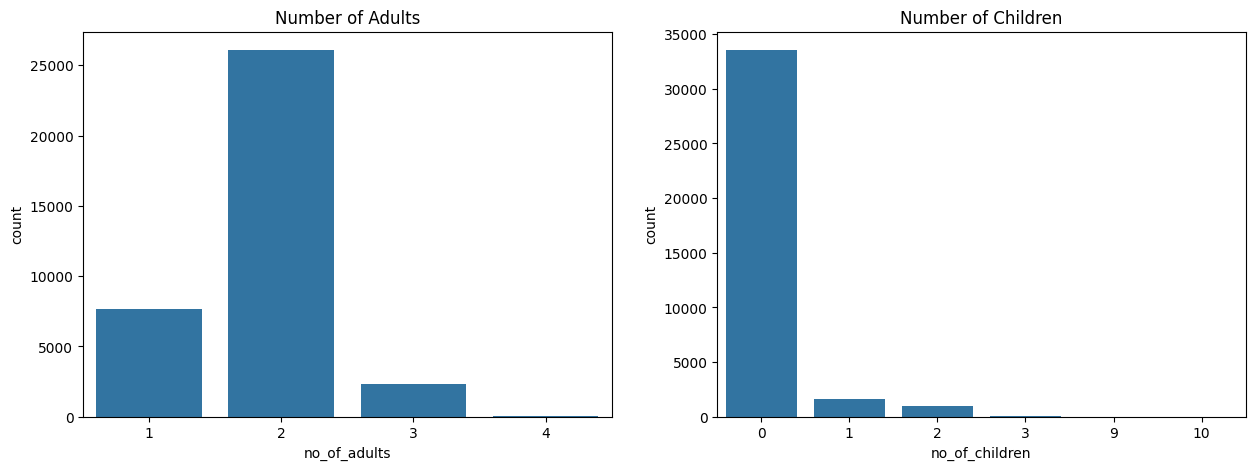

In [13]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot( x = 'no_of_adults', data = df, ax=ax[0]).set_title('Number of Adults')
sns.countplot( x = 'no_of_children', data = df, ax=ax[1]).set_title('Number of Children')

These graphs shows the distribution of the guest information which includes number of adults and children. The majority of bookings were made for 2 adults with no children which could mean that most of the bookings were made for couples. The second most common booking was for 1 adult with no children which could mean that most of the bookings were made for business trips. A few bookings were made with 1 or  2 children which could be by a family.

### Time Spent at Hotel

Text(0.5, 1.0, 'Number of Week Nights')

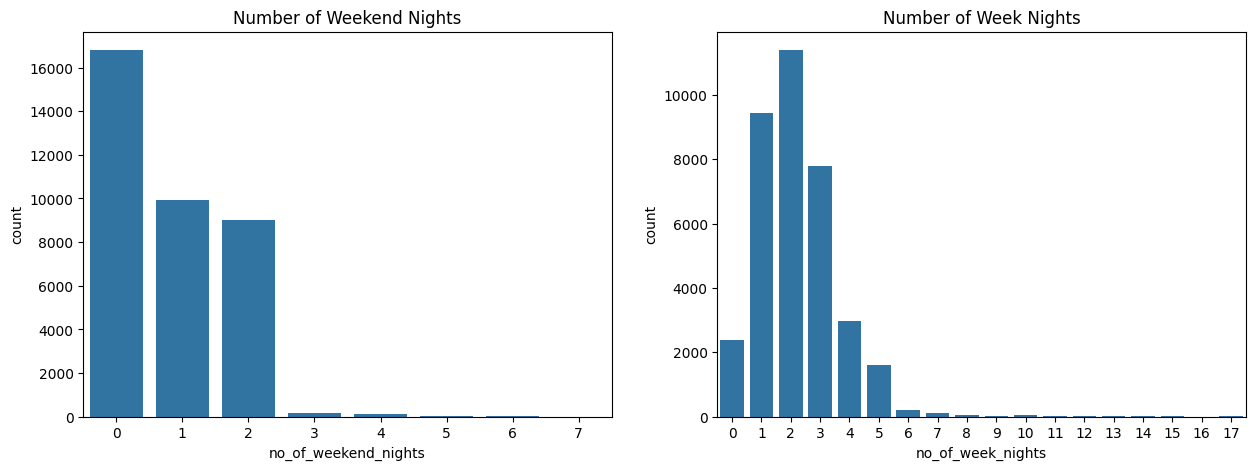

In [14]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x = 'no_of_weekend_nights', data = df, ax=ax[0]).set_title('Number of Weekend Nights')
sns.countplot(x = 'no_of_week_nights', data = df, ax=ax[1]).set_title('Number of Week Nights')

These graphs shows that most of the guest reserved to staye at the hotel on non weekend nights. The majority of the hotel bookings were for 1 or 2 nights. However, considerable number of bookings take place for the weekends. From this I assume that the bookings for the weekends were for vacation and the those for the weekdays were for business trips or for other reasons.

### Date of Arrival

Text(0.5, 1.0, 'Day of week of arrival')

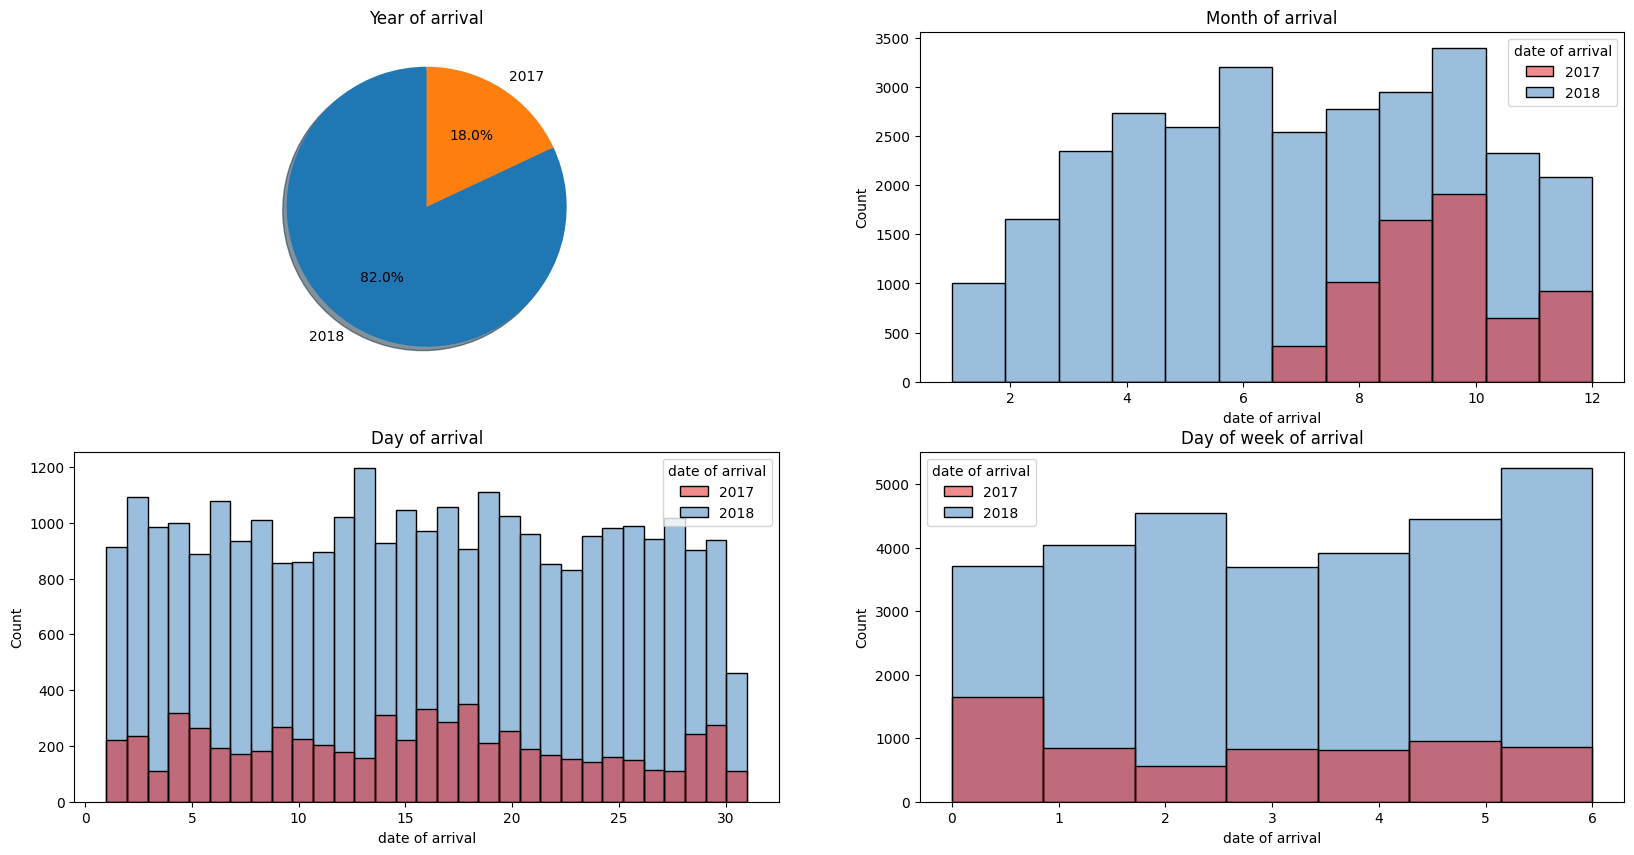

In [15]:
fig, ax = plt.subplots(2,2,figsize=(20,10))

#year of arrival
ax[0,0].pie(df['date of arrival'].dt.year.value_counts(), labels = [2018,2017], autopct='%1.1f%%', shadow=True, startangle=90)
ax[0,0].set_title('Year of arrival')

#month of arrival   
sns.histplot(x = df['date of arrival'].dt.month, ax=ax[0,1], bins=12, hue = df['date of arrival'].dt.year, palette = 'Set1').set_title('Month of arrival')

#day of arrival
sns.histplot(x = df['date of arrival'].dt.day, ax=ax[1,0], bins=31, hue = df['date of arrival'].dt.year, palette = 'Set1').set_title('Day of arrival')

#day of week of arrival
sns.histplot(x = df['date of arrival'].dt.dayofweek, ax=ax[1,1], bins=7, hue = df['date of arrival'].dt.year, palette = 'Set1').set_title('Day of week of arrival')

These graphs shows the number of bookings for the specific date, day, month and year. In the dataset, majority of the bookings were in 2018, i.e. 82%. In both the years the month of October had most booings as compared to other months. In 2017 nearly 2000 bookings in october and in 2018 nearly 3500. In addtion to that June had highest number of bookings after October. Coming to the days of the month, In 2017, 4,14,16,18 days from the month had the most reservations. In 2018, 2,7,14,19 days of the month had the most reservations. In the days of the week, Sundays had the highest number of reservations in 2017, whereas the Saturdays had the highest number of reservations in 2018.

From the above visualizations, I can conclude that more bookings were made in June and October particulary on the second and third weeks and during the weekends.

### Average room price

Text(0.5, 1.0, 'Average Room Price')

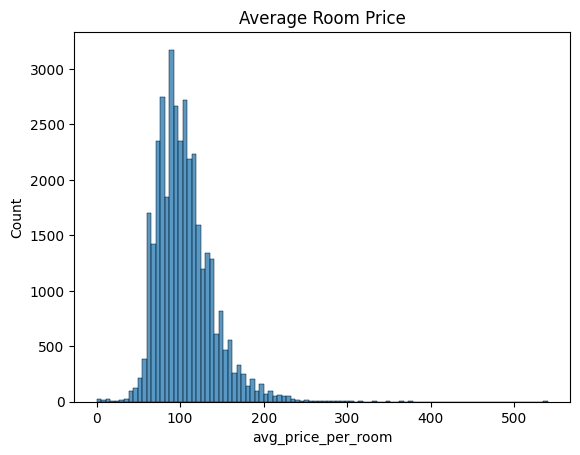

In [19]:
sns.histplot(x = 'avg_price_per_room', data = df, bins = 100).set_title('Average Room Price')

This graph shows the distribution of the room price. Majority of the reservations made had room price between 75 to 150. Very few of the reservations had room price more than 200.

##### Till now, I have plotted the distribution of data in all the variables and made some hypotheis around it. Now, I will look at the relationship between the independent variables and the target variable, to check the hypothesis.

### Guest Information and Cancellation

Text(0.5, 1.0, 'Number of Children')

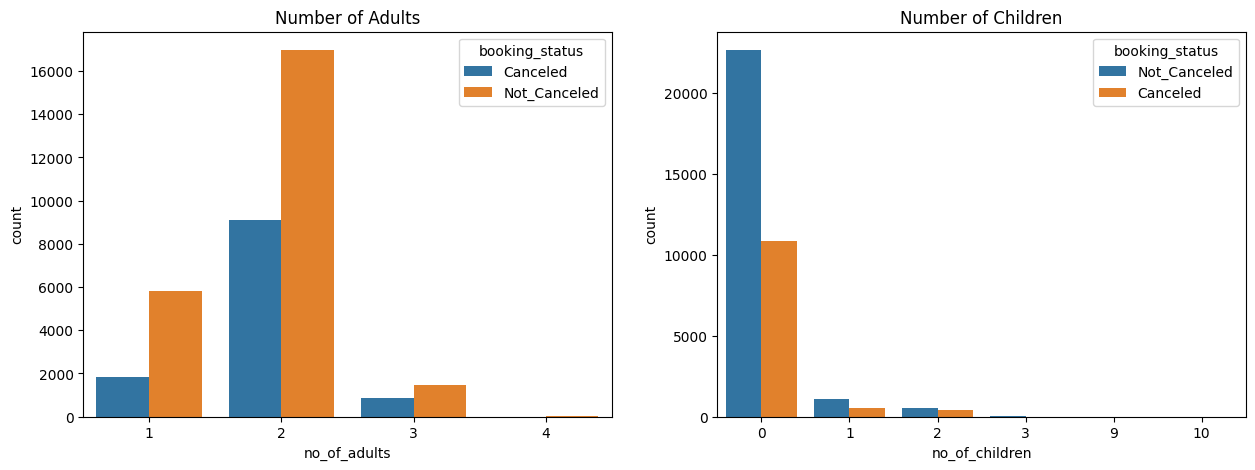

In [20]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot( x = 'no_of_adults', data = df, ax=ax[0], hue= 'booking_status').set_title('Number of Adults')
sns.countplot( x = 'no_of_children', data = df, ax=ax[1], hue = 'booking_status').set_title('Number of Children')

Majority of the reservation cancellations were made when the reservation was made for two adults, probably with no children. The second most common cancellation was made when the reservation was made for one adult. However, the number of cancellation reduces, when the reservation includes children and had more than 2 adults.

### Time Spent at Hotel and Cancellation

Text(0.5, 1.0, 'Number of Week Nights')

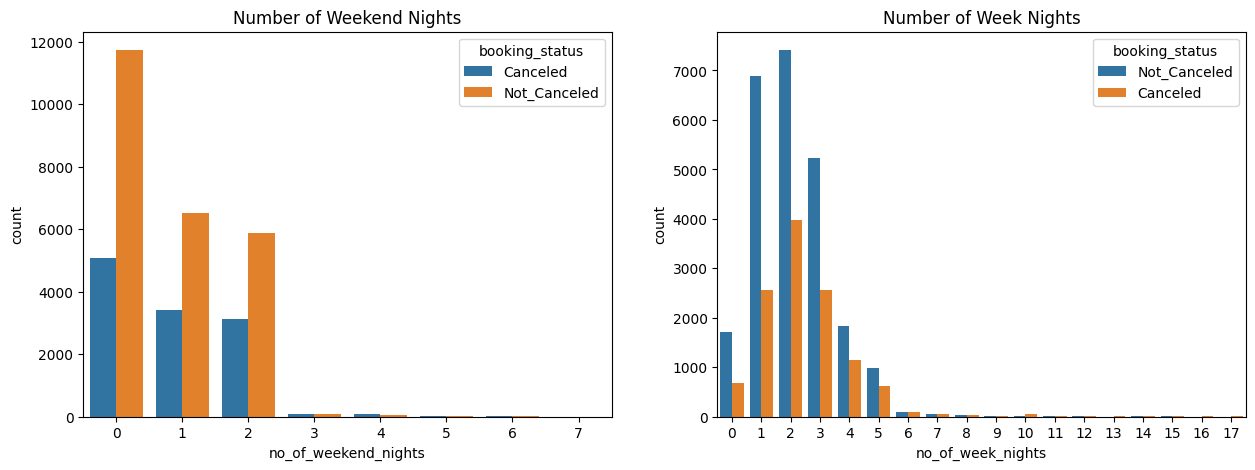

In [21]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x = 'no_of_weekend_nights', data = df, ax=ax[0], hue = 'booking_status').set_title('Number of Weekend Nights')
sns.countplot(x = 'no_of_week_nights', data = df, ax=ax[1], hue = 'booking_status').set_title('Number of Week Nights')

These graphs reveal interesting facts about reservation cancellation. The reservations made to spend 1 or 2 weekends nights have lower count of being cancelled. As compared to the reservations made to spend 2 weekdays at the hotel had the highest cancellation count followed by 1 and 3 week days. This could mean that guest could cancel their reservation, if they were palnning to stay during the week days and for less than 3 days. However, this count is lower, when reservations are made for weekends.

### Date of Arrival and Cancellation

Text(0.5, 1.0, 'Cancellation by day of week in 2018')

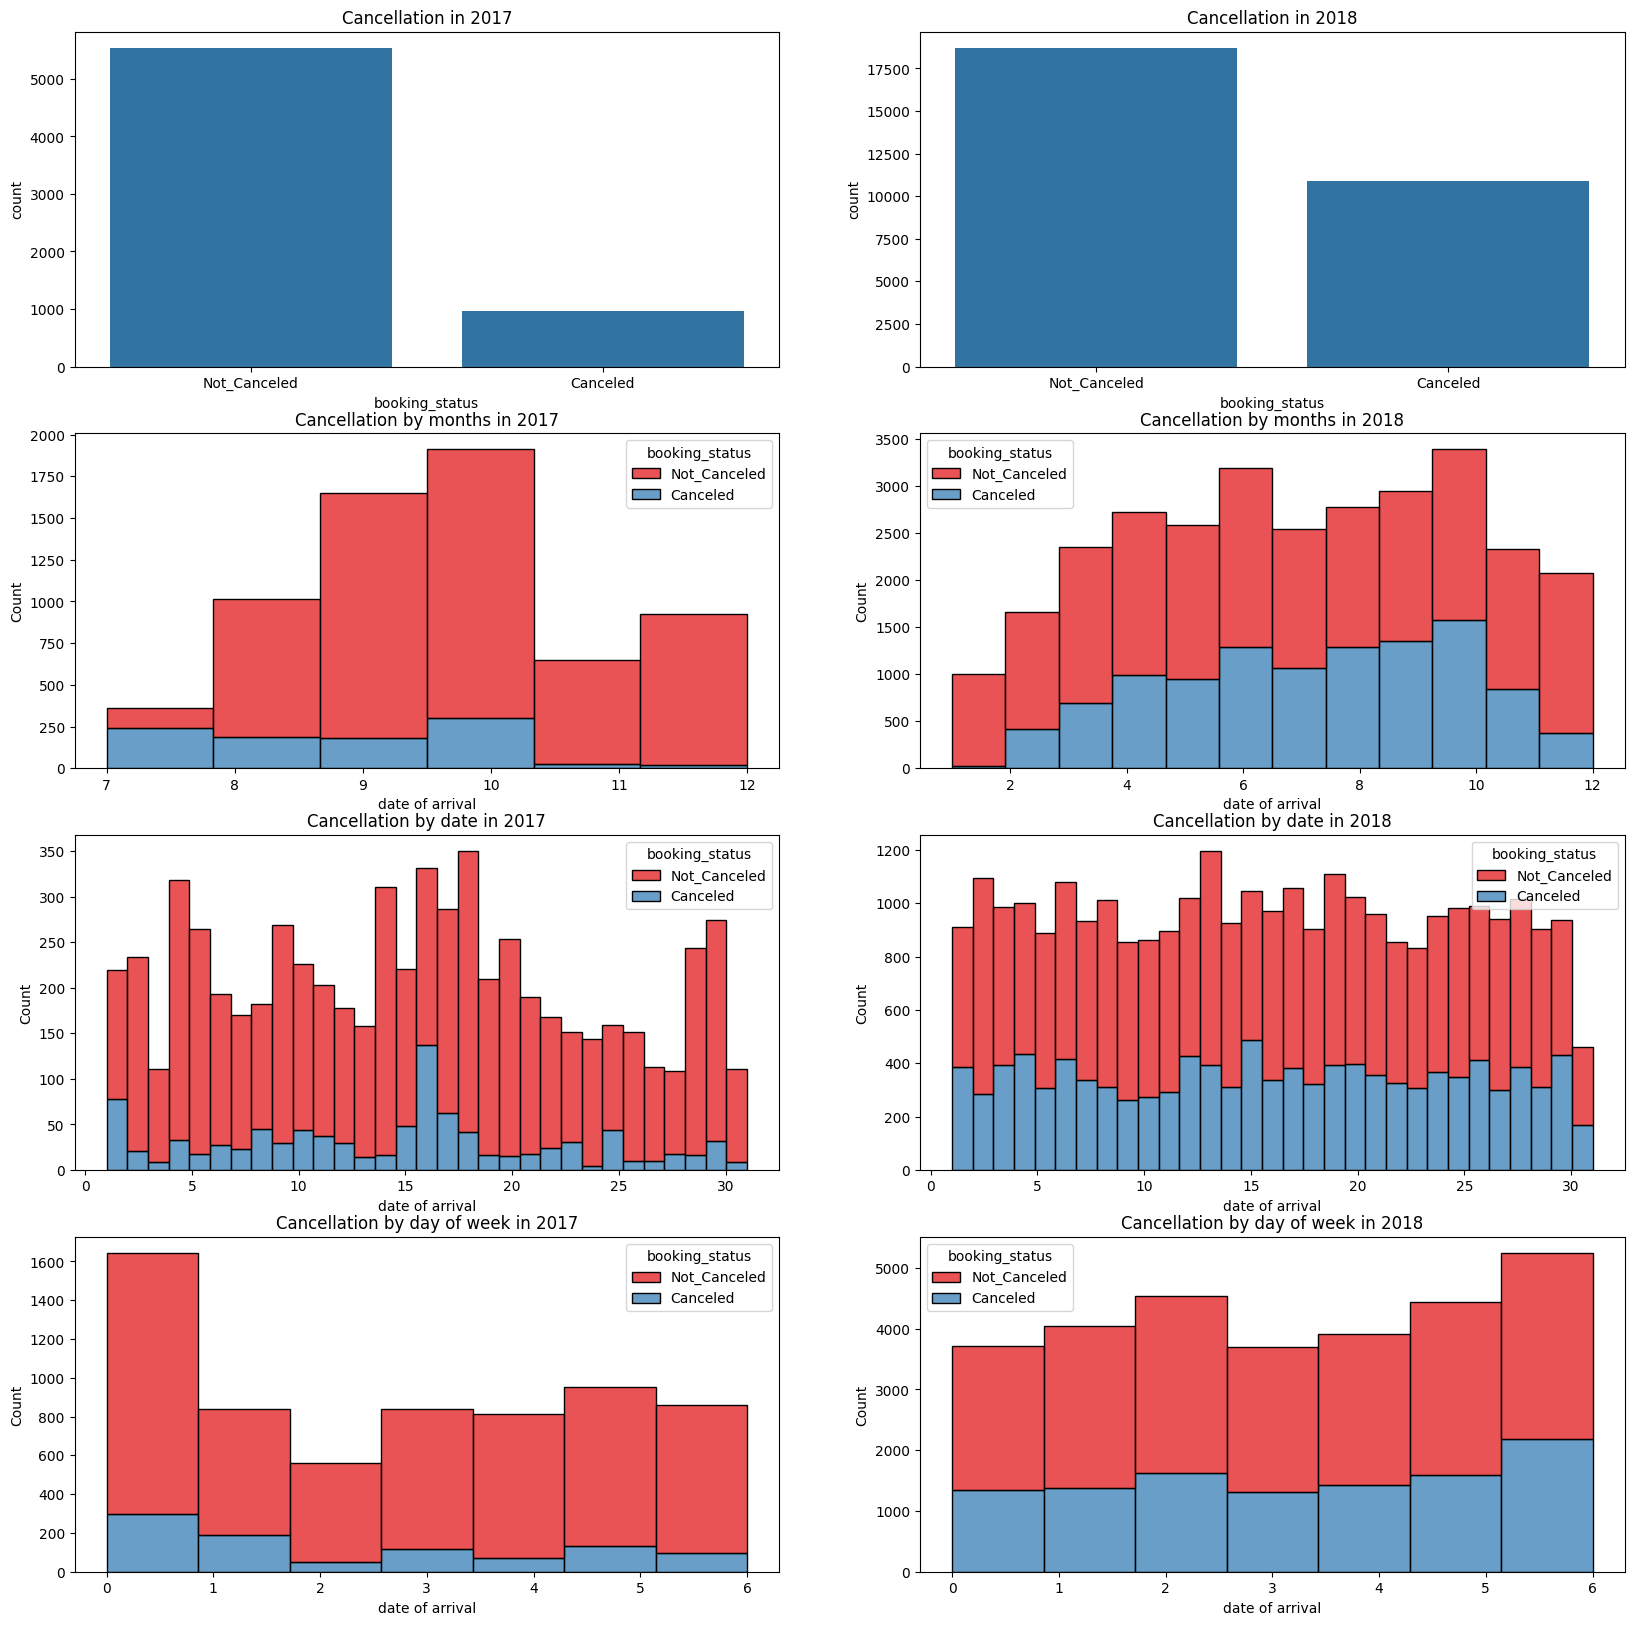

In [22]:
fig,ax = plt.subplots(4,2,figsize=(20,20))
df_2017 = df[df['date of arrival'].dt.year == 2017]
df_2018 = df[df['date of arrival'].dt.year == 2018]

#year wise
sns.countplot(x = df_2017['booking_status'], data = df_2017, ax=ax[0,0]).set_title('Cancellation in 2017')
sns.countplot(x = df_2018['booking_status'], data = df_2018, ax=ax[0,1]).set_title('Cancellation in 2018')

#month wise
sns.histplot(x = df_2017['date of arrival'].dt.month, data = df_2017, ax=ax[1,0], bins=6, hue = df_2017['booking_status'], palette = 'Set1', multiple = 'stack').set_title('Cancellation by months in 2017')
sns.histplot(x = df_2018['date of arrival'].dt.month, data = df_2018, ax=ax[1,1], bins=12, hue = df_2018['booking_status'], palette = 'Set1', multiple ='stack').set_title('Cancellation by months in 2018')

#date wise
sns.histplot(x = df_2017['date of arrival'].dt.day, data = df_2017, ax=ax[2,0], bins=31, hue = df_2017['booking_status'], palette = 'Set1', multiple='stack').set_title('Cancellation by date in 2017')
sns.histplot(x = df_2018['date of arrival'].dt.day, data = df_2018, ax=ax[2,1], bins=31, hue = df_2018['booking_status'], palette = 'Set1', multiple ='stack').set_title('Cancellation by date in 2018')

#day of week wise
sns.histplot(x = df_2017['date of arrival'].dt.dayofweek, data = df_2017, ax=ax[3,0], bins=7, hue = df_2017['booking_status'], palette = 'Set1', multiple = 'stack').set_title('Cancellation by day of week in 2017')
sns.histplot(x = df_2018['date of arrival'].dt.dayofweek, data = df_2018, ax=ax[3,1], bins=7, hue = df_2018['booking_status'], palette = 'Set1', multiple = 'stack').set_title('Cancellation by day of week in 2018')

The above graphs visualizes the reservation cancellation based on the dates the reservations were made. As we know that dataset mostly has reservations from 2018, despite of that, the number of reservations cancelled in 2018 is way higher than 2017. In 2017, nearly 5500 reservations were not cancelled and nearly 1000 where cancelled. However in 2018, 17500 reservations were not cancelled and more than 10000 reservations were cancelled. This shows that rate of reservation cancellation was much higher in 2018

Coming to the reservation cancellation according to the months, in 2017 reservations made in July and October had the highest. In addtion to that July had the least number of reservations made but still it has highest cancellation, which points some particular reason, not specified by the data. In 2018, June and October had the highest number of reservations made.

Now, we will look at the reservation cancellations by date of the month. In 2017, most reservations were cancelled for 16th and peculiarly on 1st of the month. In 2018, the number of cancellations were more in second and first week.

Coming to the day wise cancellation, in 2017 Sundays had the highest number of cancellations. In 2018, Saturdays had the highest number of cancellations.

### Average room price and Cancellation

Text(0.5, 1.0, 'Average Room Price')

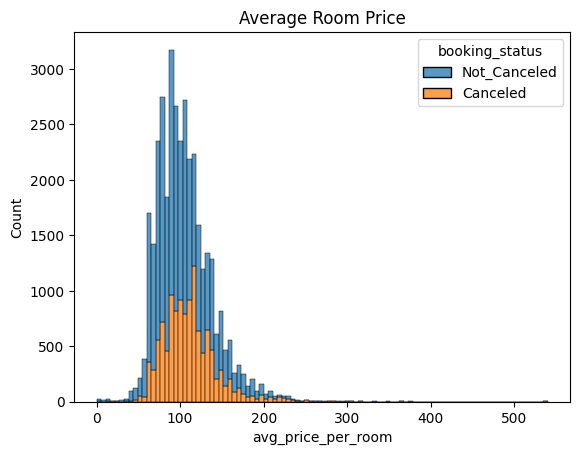

In [25]:
sns.histplot(x = 'avg_price_per_room', data = df, bins = 100, hue = 'booking_status', multiple = 'stack').set_title('Average Room Price')

Most of the room prices are between 75-150 and the number of reservations cancellation mostly occur in the same range. Therefore, there is no relation between the room price and reservation cancellation.

## Data Preprocessing Part 2

### Outlier Removal using IQR

In [26]:
#columns for outlier removal
cols = ['lead_time', 'avg_price_per_room']

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

#removing outliers
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

### Label Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder
import sklearn as sk

# Label encoding object
le = sk.preprocessing.LabelEncoder()

# Columns to be encoded
cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']

# Label encoding
for col in cols:
    le.fit(df[col])
    df[col] = le.transform(df[col])
    print(col, df[col].unique())


type_of_meal_plan [0 3 1 2]
room_type_reserved [0 3 5 4 1 6 2]
market_segment_type [3 4 2 0 1]
booking_status [1 0]


### Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
#standardizing the data
scaler = StandardScaler()
df[['lead_time', 'avg_price_per_room']] = scaler.fit_transform(df[['lead_time', 'avg_price_per_room']])

## Correlation Matrix Heatmap

<Axes: >

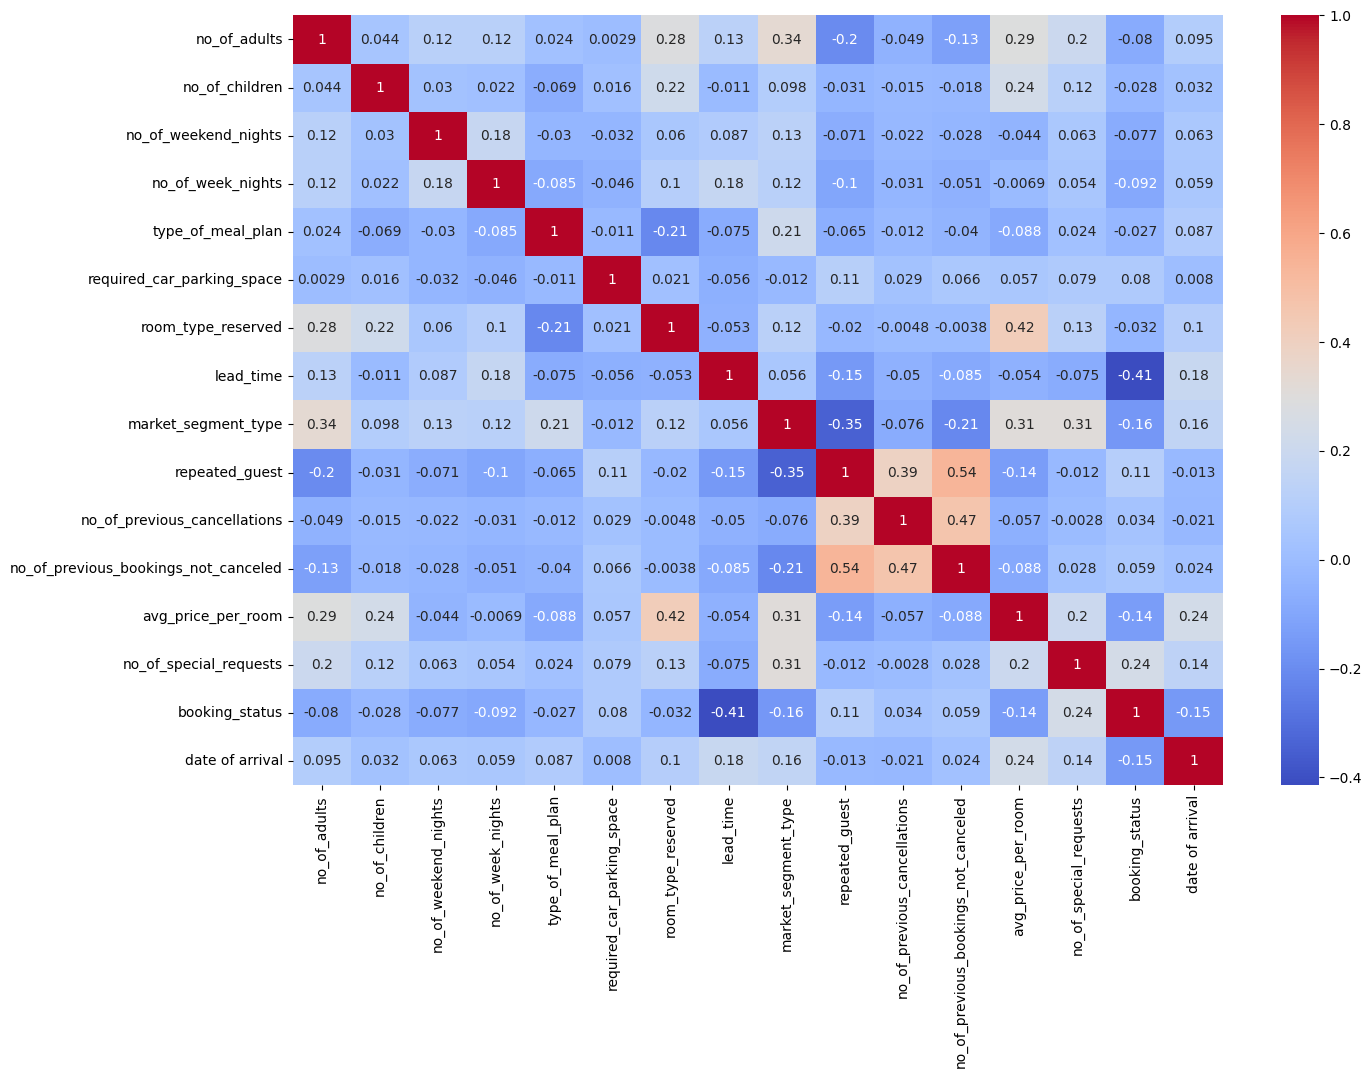

In [35]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [36]:
# Having issue with the model training due to this column
df.drop(columns=['date of arrival'], inplace=True)

## Train Test Split

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('booking_status', axis=1), df['booking_status'], test_size=0.2, random_state=42)

## Model Building

I will be using the following classification models:
- Decision Tree Classifier
- Random Forest Classifier

### Decision Tree Classifier

In [81]:
from sklearn.tree import DecisionTreeClassifier

#decision tree classifier Object
dtree = DecisionTreeClassifier()

#### Hyperparameter Tuning using GridSearchCV

In [90]:
from sklearn.model_selection import GridSearchCV

#grid search parameters
grid_param = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state' : [0,42]
}

#grid search object
grid_search = GridSearchCV(estimator=dtree, param_grid=grid_param, cv=5, n_jobs=-1, scoring='accuracy')

#fitting the grid search object to the training data
grid_search.fit(X_train, y_train)

#best parameters
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 0}


In [82]:
#decision tree classifier object with best parameters
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4, min_samples_split=2, random_state=0)

#Training the model
dtree.fit(X_train, y_train)

#Training accuracy
print(dtree.score(X_train, y_train))

#Predicting the test set results
d_pred = dtree.predict(X_test)

0.85635687732342


### Random Forest Classifier

In [83]:
from sklearn.ensemble import RandomForestClassifier

#random forest classifier object
rfc = RandomForestClassifier()

#### Hyperparameter Tuning using GridSearchCV

In [84]:
from sklearn.model_selection import GridSearchCV

#grid search parameters
grid_param = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state' : [0,42]
}

#grid search object
grid_search = GridSearchCV(estimator=rfc, param_grid=grid_param, cv=5, n_jobs=-1)

#fitting the grid search object to the training data
grid_search.fit(X_train, y_train)

#best parameters
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 0}


In [85]:
#random forest classifier object with best parameters
rfc = RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4, min_samples_split=2, random_state=0)

#Training the model
rfc.fit(X_train, y_train)

#Training accuracy
print(rfc.score(X_train, y_train))

#Predicting the test set results
r_pred = rfc.predict(X_test)

0.850185873605948


### Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression

#logistic regression object
logreg = LogisticRegression()

## Model Evaluation

### Confusion Matrix Heatmap

NameError: name 'd_pred' is not defined

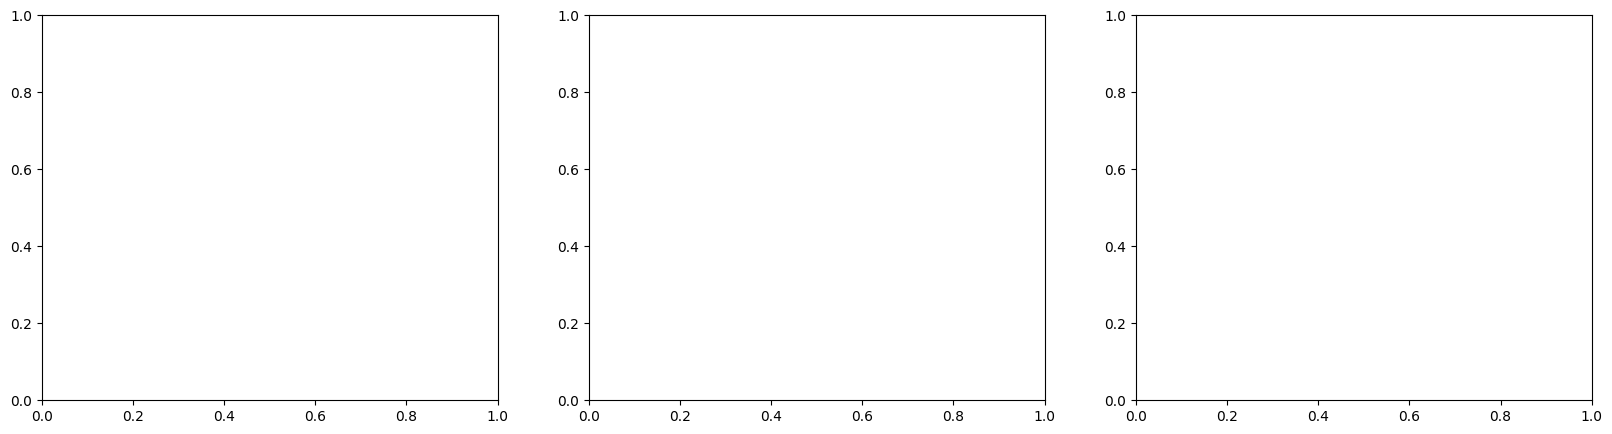

In [38]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1,3,figsize=(20,5))

#decision tree
sns.heatmap(confusion_matrix(y_test, d_pred), annot=True, cmap='coolwarm', ax=ax[0]).set_title('Decision Tree')
#random forest
sns.heatmap(confusion_matrix(y_test, r_pred), annot=True, cmap='coolwarm', ax=ax[1]).set_title('Random Forest')
#logistic regression
sns.heatmap(confusion_matrix(y_test, l_pred), annot=True, cmap='coolwarm', ax=ax[2]).set_title('Logistic Regression')

### Distribution Plot

C:\Users\DELL\AppData\Local\Temp\ipykernel_13552\2275218665.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, ax=ax[0], hist= False).set_title('Decision Tree')
C:\Users\DELL\AppData\Local\Temp\ipykernel_13552\2275218665.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

<Axes: title={'center': 'Logistic Regression'}, xlabel='booking_status', ylabel='Density'>

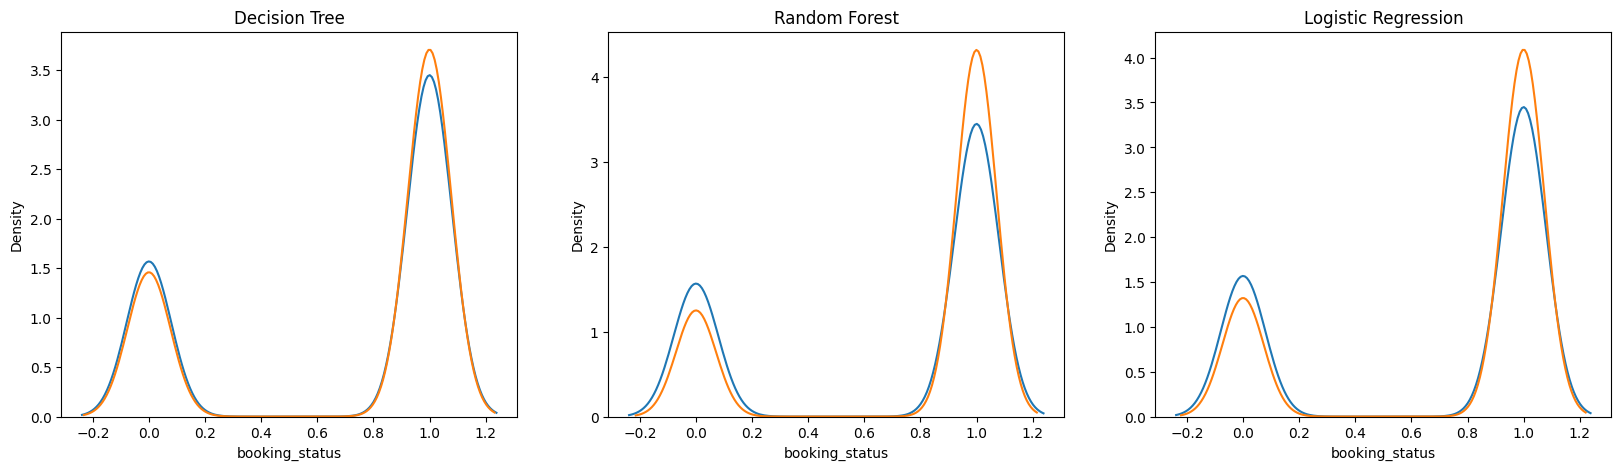

In [97]:
fig, ax  = plt.subplots(1,3,figsize=(20,5))

#decision tree
sns.distplot(y_test, ax=ax[0], hist= False).set_title('Decision Tree')
sns.distplot(d_pred, ax=ax[0], hist = False)

#random forest
sns.distplot(y_test, ax=ax[1], hist= False).set_title('Random Forest')
sns.distplot(r_pred, ax=ax[1], hist = False)

#logistic regression
sns.distplot(y_test, ax=ax[2], hist= False).set_title('Logistic Regression')
sns.distplot(l_pred, ax=ax[2], hist = False)

### Classification Report

In [92]:
from sklearn.metrics import classification_report

#decision tree
print('Decision Tree')
print(classification_report(y_test, d_pred))
#random forest
print('Random Forest')
print(classification_report(y_test, r_pred))
#logistic regression
print('Logistic Regression')
print(classification_report(y_test, l_pred))

Decision Tree
              precision    recall  f1-score   support

           0       0.78      0.71      0.74      2101
           1       0.87      0.91      0.89      4624

    accuracy                           0.85      6725
   macro avg       0.83      0.81      0.82      6725
weighted avg       0.84      0.85      0.85      6725

Random Forest
              precision    recall  f1-score   support

           0       0.84      0.60      0.70      2101
           1       0.84      0.95      0.89      4624

    accuracy                           0.84      6725
   macro avg       0.84      0.78      0.80      6725
weighted avg       0.84      0.84      0.83      6725

Logistic Regression
              precision    recall  f1-score   support

           0       0.72      0.56      0.63      2101
           1       0.82      0.90      0.86      4624

    accuracy                           0.80      6725
   macro avg       0.77      0.73      0.75      6725
weighted avg       0.79   

### Model Metrics

In [100]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

#decision tree
print('Decision Tree')
print('Accuracy Score: ', accuracy_score(y_test, d_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, d_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, d_pred))

print('\n')

#random forest
print('Random Forest')
print('Accuracy Score: ', accuracy_score(y_test, r_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, r_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, r_pred))

print('\n')

#logistic regression
print('Logistic Regression')
print('Accuracy Score: ', accuracy_score(y_test, l_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, l_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, l_pred))

Decision Tree
Accuracy Score:  0.8472862453531599
Mean Absolute Error:  0.15271375464684014
Mean Squared Error:  0.15271375464684014


Random Forest
Accuracy Score:  0.840446096654275
Mean Absolute Error:  0.15955390334572492
Mean Squared Error:  0.15955390334572492


Logistic Regression
Accuracy Score:  0.7955390334572491
Mean Absolute Error:  0.20446096654275092
Mean Squared Error:  0.20446096654275092


### Model Comparison

Text(0.5, 1.0, 'Mean Squared Error')

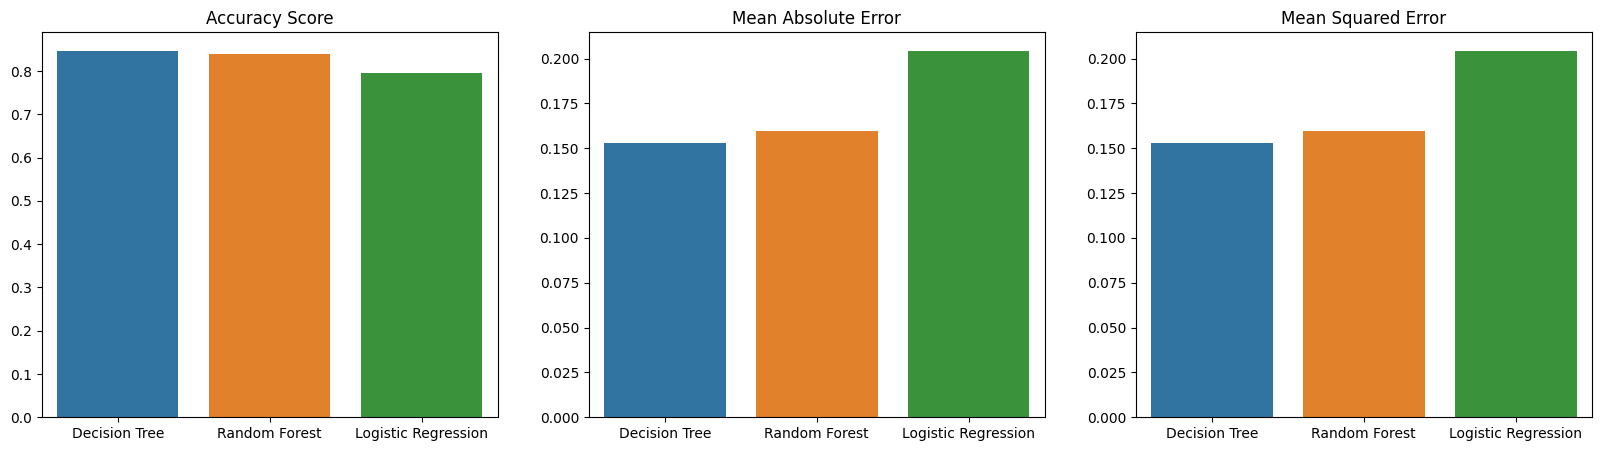

In [101]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
#Accuracy Score
sns.barplot(x = ['Decision Tree', 'Random Forest', 'Logistic Regression'], y = [accuracy_score(y_test, d_pred), accuracy_score(y_test, r_pred), accuracy_score(y_test, l_pred)], ax=ax[0]).set_title('Accuracy Score')
#Mean Absolute Error
sns.barplot(x = ['Decision Tree', 'Random Forest', 'Logistic Regression'], y = [mean_absolute_error(y_test, d_pred), mean_absolute_error(y_test, r_pred), mean_absolute_error(y_test, l_pred)], ax=ax[1]).set_title('Mean Absolute Error')
#Mean Squared Error
sns.barplot(x = ['Decision Tree', 'Random Forest', 'Logistic Regression'], y = [mean_squared_error(y_test, d_pred), mean_squared_error(y_test, r_pred), mean_squared_error(y_test, l_pred)], ax=ax[2]).set_title('Mean Squared Error')

### Feature Importance

Feature Importance from best two models

Text(0.5, 1.0, 'Decision Tree')

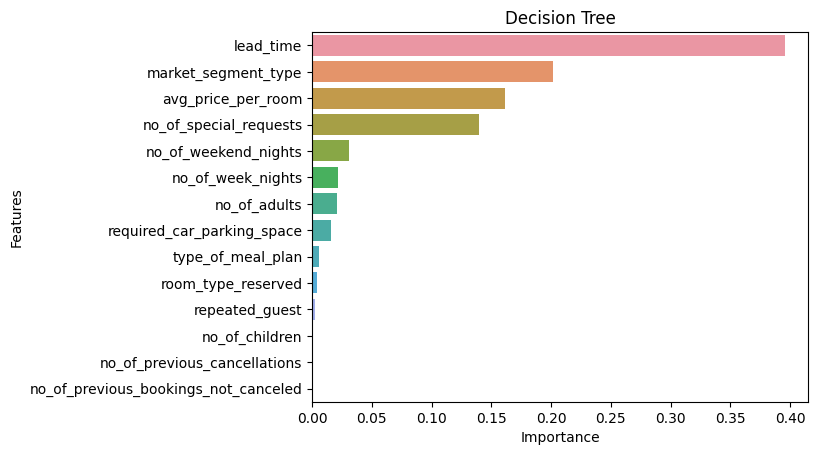

In [103]:
#decision tree
feature_importance = pd.DataFrame({'Features': X_train.columns, 'Importance': dtree.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_importance).set_title('Decision Tree')

Text(0.5, 1.0, 'Random Forest')

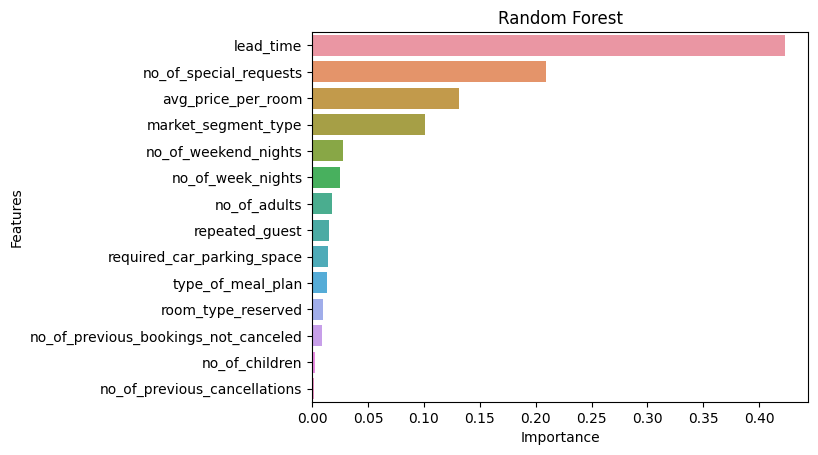

In [104]:
#random forest
feature_importance = pd.DataFrame({'Features': X_train.columns, 'Importance': rfc.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_importance).set_title('Random Forest')

## Conclusion

From the Exploratory Data Analysis, I came to know that, the most of the reservations wjere made for 2 adults with no children which could probably for a couple had highest cancellation count. In addtion to that, the cancellation count of reservations decreases when there are children involved. Most of the reservations were made for week nights and had exponentially higher cancellations as compared to those made for weekend nights.

The year 2018 had higher cancellation rate as compared to 2017, with most of the cancellation done in month of July and October. Upon visualization of the services opted during reservation with booking status, it was found that the services opted during reservation does not have any impact on the reservation cancellation. 

The lead time had a huge impact on the reservation cancellation, which has been evident from feature importance as well. The guest who have lead time very less are less likely to cancel the reservation as compared to the guest who have more lead time. Therefore, with increased lead time, the guests have more time to think about the reservation and thus they are more likely to cancel the reservation. So, the hotel should try to take reservations for shorter lead time.

The market segment of the reservation also had an impact on the reservation cancellation. The reservations made through online platforms had the highest number of cancellations. This highlights the hotel's reputation and presence on online platforms. The hotel should try to improve its reputation on online platforms to reduce the reservation cancellation.

Coming to the classification models, I have used Decision Tree Classifier, Random Forest Classifier, Logistic Regression for predicting the reservation cancellation. The Decision Tree Classifier had the highest accuracy i.e. 85% among all the models. 